In [1]:
using Agents, Plots, LightGraphs, GraphRecipes, MetaGraphs, Random
include("src/warehouse.jl")
include("src/cbs.jl")

warehouse_step! (generic function with 1 method)

In [6]:
 ## Simulation 
m = 17
n = 15
n_packages = 1000
load_spots = collect(32:4:60)
factor = 2
# load_spots = [4]

g,p,d = generate_warehouse_struct(m,n,d_start=2,graph_type=SimpleGraph)
package_list = rand(1:length(d),n_packages)

warehouse_space = GraphSpace(g)
model_props = Dict(:package_list=>package_list,
:load_spot=>load_spots,
:last_spot=> length(load_spots),
:dest_spot=>d,
:graph => g,
:step => 1,
:used_load_spots=>zeros(Int,(length(load_spots))))
warehouse = ABM(Robot, warehouse_space;properties= model_props)

dest_spot_grid = model_props[:dest_spot].-(2*n+1)

robot_colors = (x,y)-> robot_colors_spots(x,y,model_props[:load_spot],dest_spot_grid)
robot_sizes = (x,y,z) -> robot_sizes_spots(x,y,z,model_props[:load_spot],model_props[:dest_spot],dest_spot_grid,factor)
# add_agent!(Robot(1,1,0,1,[]),1, warehouse)
# for (i,j) in enumerate(30:30:240)
n_agents = 0
for (i,j) in enumerate(31:31:1085)
    add_agent!(Robot(i,j,0,1,[]),j, warehouse)
    n_agents += 1
end

cs=fill(0.05, nv(g), nv(g))
plotabm(warehouse;am=(x,y)->:rect,as=robot_sizes,ac=robot_colors,x=p[:,2],y=p[:,1],curves=false,arrow=true,curvature_scalar=cs,size=(2000,2000),linealpha=0.5,markerstrokewidth=0.0)
savefig("fig_$(m)_$(n)_$factor.png")

In [7]:
plot_warehouse = ()-> plotabm(warehouse;am=(x,y)->:rect,as=robot_sizes,ac=robot_colors,x=p[:,2],y=p[:,1],curves=false,curvature_scalar=cs,size=(750,750),linealpha=0.5,markerstrokewidth=0.0)

#87 (generic function with 1 method)

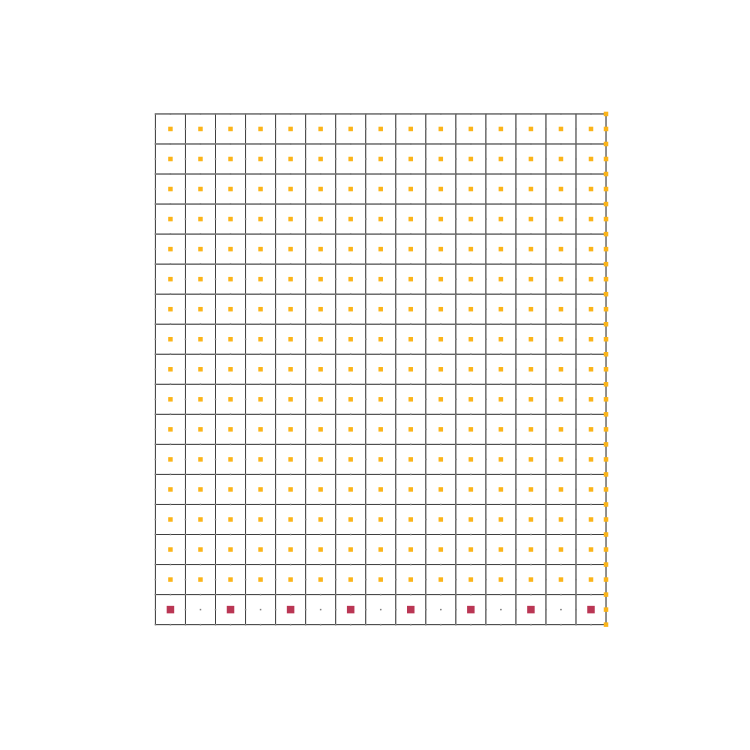

In [8]:
plot_warehouse()

In [10]:
robot_step

LoadError: UndefVarError: robot_step not defined

In [9]:
adata = [:pos, :dest,:head]
data, _ = run!(warehouse, robot_step!,warehouse_step!,terminate_warehouse_sim; adata)
println("n_steps:$(warehouse.properties[:step])")
println(warehouse.used_load_spots)

LoadError: InterruptException: